# BinaryClassification 
For over or below $50000 income

In [46]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [80]:
adult = pd.read_csv("data/adult.csv", header = None, sep=',', names=['Age','Work_Class','fnlwgt', 'Education', 'Education_Num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country', 'Target'])
adult.head(3)

,Age,Work_Class,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [81]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Work_Class      32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_Per_Week  32561 non-null  int64 
 13  Native_Country  32561 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
Work_Class, Education, Marital_Status, 

In [82]:
adult.shape

(32561, 15)

In [83]:
adult.columns

Index(['Age', 'Work_Class', 'fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Target'],
      dtype='object')

In [95]:
cols = adult.columns
for i in cols:
    print(i,':\n')
    print(adult[i].value_counts(),'\n')

Age :

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64 

Work_Class :

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Work_Class, dtype: int64 

fnlwgt :

203488    13
123011    13
164190    13
148995    12
113364    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: fnlwgt, Length: 21648, dtype: int64 

Education :

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168


In [93]:
adult['Work_Class'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Work_Class, dtype: int64

## EDA  
분포는 범주형 데이터의 경우 카운트 플롯(count plot),   
실수형 데이터의 경우 히스토그램(histogram)을 사용하여 시각적으로 표현

In [106]:
#범주형 데이터 
categorical_feature = [col for col in adult.columns if adult[col].dtypes == "object"]
categorical_feature

['Work_Class',
 'Education',
 'Marital_Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_Country',
 'Target']

In [109]:
#이산형 데이터 
numerical_feature = [col for col in adult.columns if adult[col].dtypes == "int64"]
numerical_feature

['Age',
 'fnlwgt',
 'Education_Num',
 'Capital_Gain',
 'Capital_Loss',
 'Hours_Per_Week']

파이썬에서는 다음과 같은 NumPy 함수를 사용하여 각종 대푯값을 계산할 수 있다. 범주형 데이터는 실수로 바꾼 다음에 대푯값을 계산한다.

mean(): 표본평균 계산

median(): 표본중앙값 계산

argmax(): 이산데이터의 최댓값 계산

histogram(): 데이터를 구간으로 나누어 각 구간에 들어가는 데이터 개수 계산.

In [108]:
# print("표본평균 = {}, 표본중앙값 = {}".format(np.mean(x), np.median(x)))

엑셀 시트 확인 : workclass, occupation, native-country 컬럼은 '?' 가 포함되어 있음  

In [91]:
adult.replace('?', np.nan, inplace=True)
adult=adult.fillna(adult.mean())
adult = adult.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [88]:
missing_columns = ['Work_Class', 'Occupation', 'Native_Country']  

for column in missing_columns:
    adult.replace(' ?', adult[column].mode(), inplace=True)  

In [92]:
adult['Work_Class'].str.contains(' ?')

0        True
1        True
2        True
3        True
4        True
         ... 
32556    True
32557    True
32558    True
32559    True
32560    True
Name: Work_Class, Length: 32561, dtype: bool

In [35]:
adult.describe(include=['O'])

,Work_Class,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native_Country,Target
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [37]:
def encode_features(dataDF):
    features = ['Work_Class', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_Country', 'Target']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

adult = encode_features(adult)
adult.head(3)

,Age,Work_Class,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Target
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Work_Class'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Education_Num'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Relationship'}>],
       [<AxesSubplot:title={'center':'Race'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Capital_Gain'}>,
        <AxesSubplot:title={'center':'Capital_Loss'}>],
       [<AxesSubplot:title={'center':'Hours_Per_Week'}>,
        <AxesSubplot:title={'center':'Native_Country'}>,
        <AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>]],
      dtype=object)

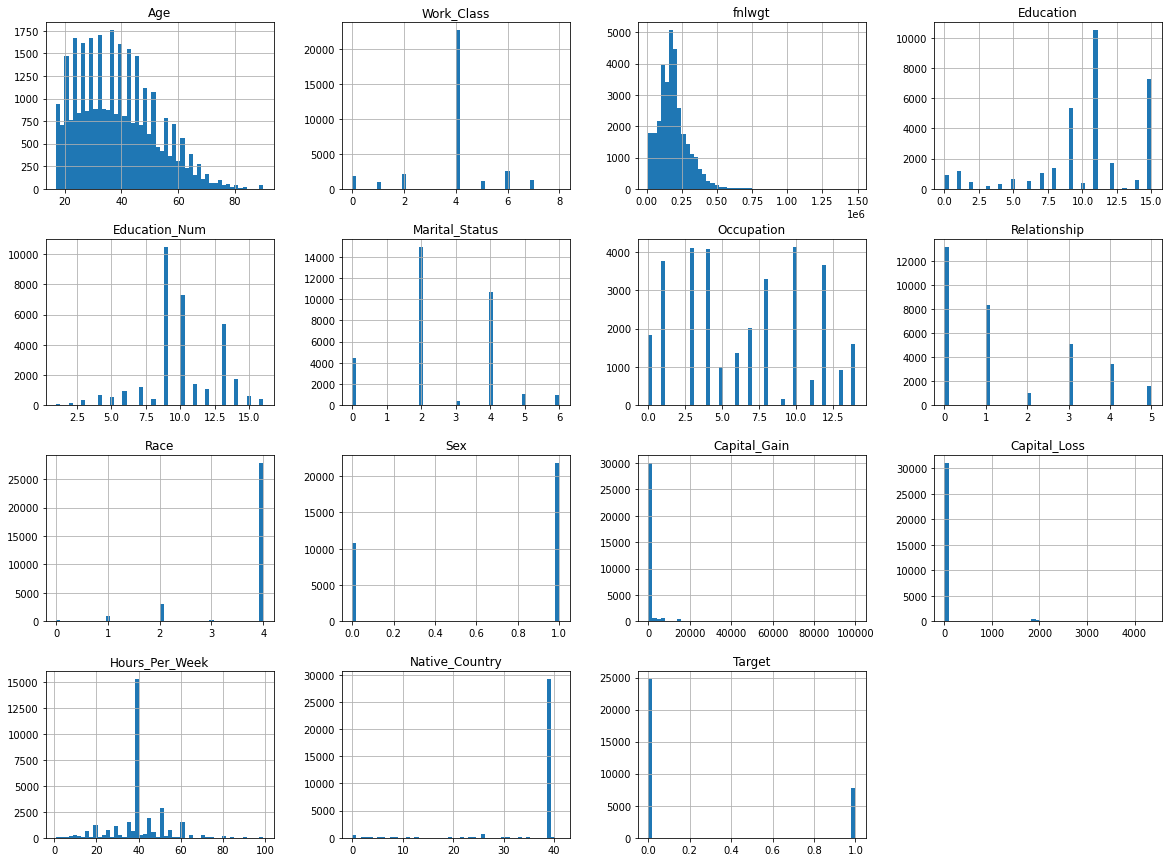

In [38]:
adult.hist(bins=50, figsize=(20, 15))

### 아웃라이어(이상치) 제거 

In [12]:
outlier = adult[(adult['Capital_Gain']>50000) | (adult['Capital_Loss']>4000)].index
adult = adult.drop(outlier, axis=0)

In [13]:
outlier

Int64Index([ 1246,  1368,  1482,  1528,  1616,  1682,  1765,  1771,  1826,
             2103,
            ...
            30244, 30496, 30781, 30913, 31111, 31828, 31972, 32090, 32238,
            32518],
           dtype='int64', length=162)

### drop columns    
'Capital_Gain','Capital_Loss','Native_Country' 컬럼 삭제 

In [14]:
def drop_features(adult):
    adult.drop(['Capital_Gain','Capital_Loss','Native_Country'], axis = 1, inplace = True)
    return adult

In [15]:
adult = drop_features(adult)
adult.head(3)

,Age,Work_Class,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Hours_Per_Week,Target
0,39,7,77516,9,13,4,1,1,4,1,40,0
1,50,6,83311,9,13,2,4,0,4,1,13,0
2,38,4,215646,11,9,0,6,1,4,1,40,0


<function matplotlib.pyplot.show(close=None, block=None)>

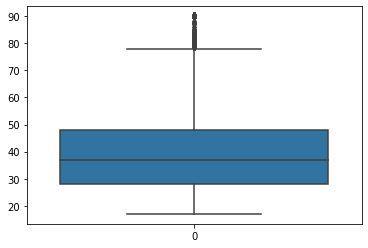

In [16]:
sns.boxplot(data=adult['Age'])
plt.show

c:\users\ad\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


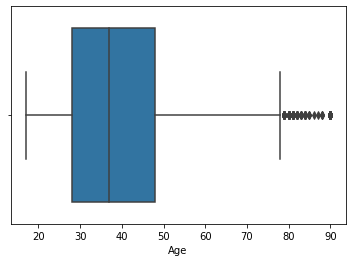

In [17]:
import seaborn as sns
sns.boxplot('Age', data = adult)
outlier = adult[(adult['Age']>80)].index
adult = adult.drop(outlier, axis=0)

In [18]:
adult.head(3)

,Age,Work_Class,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Hours_Per_Week,Target
0,39,7,77516,9,13,4,1,1,4,1,40,0
1,50,6,83311,9,13,2,4,0,4,1,13,0
2,38,4,215646,11,9,0,6,1,4,1,40,0


In [19]:
adult.shape

(32302, 12)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Work_Class'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Education_Num'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>],
       [<AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Relationship'}>,
        <AxesSubplot:title={'center':'Race'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Hours_Per_Week'}>,
        <AxesSubplot:title={'center':'Target'}>]], dtype=object)

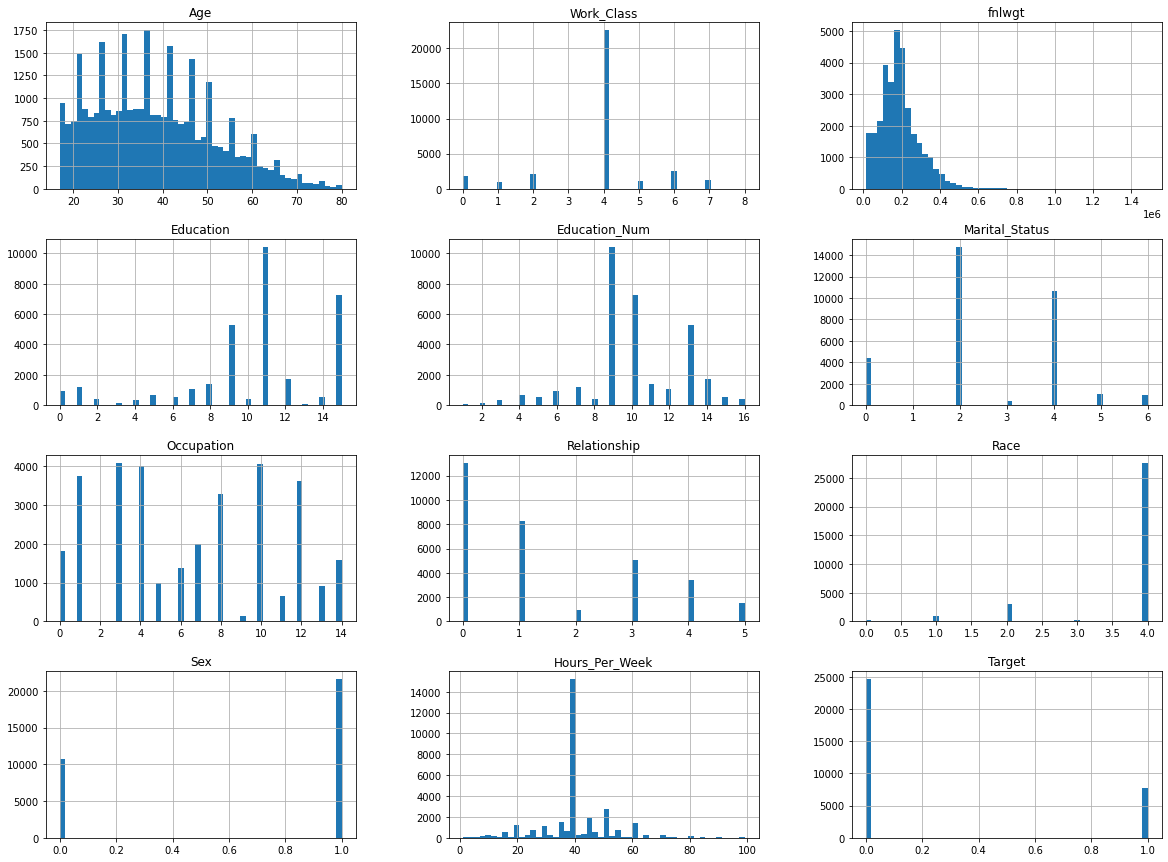

In [20]:
adult.hist(bins=50, figsize=(20, 15))

## 모델링 및 평가지표이용

dataset 분할  

In [21]:
from sklearn.model_selection import train_test_split

y_adult = adult['Target']
x_adult = adult.drop('Target',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_adult, y_adult, test_size=0.2, random_state=11)

decision tree, random forest, logistic regression, SVM, Adaboost, GBM 으로 모델링

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier(random_state=11)

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(x_train , y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(x_train , y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(x_train , y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))


DecisionTreeClassifier 정확도: 0.7700
LogisticRegression 정확도: 0.7669
RandomForestClassifier 정확도:0.8254


In [25]:
# SVM 학습/예측/평가
from sklearn import svm 
clf =svm.SVC(gamma = 0.001, C =100.)
clf.fit(x_train,y_train)
predictions = clf.predict(x_test)
print(y_test)

from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test,predictions))

3876     0
9106     0
26885    0
6139     0
2567     0
        ..
18241    1
30345    0
2207     0
5812     0
26509    0
Name: Target, Length: 6461, dtype: int32
0.7135118402724037


In [27]:
#GradientBoostingClassifier 학습/예측/평가
from sklearn.ensemble import GradientBoostingClassifier

import time
import warnings
warnings.filterwarnings('ignore')

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(x_train , y_train)
gb_pred = gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))


GBM 정확도: 0.8438
GBM 수행 시간: 2.1 초 


### GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [ 8 , 12, 16 ,20], 'min_samples_split' : [16,24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(x_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8295
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 24}


In [29]:
params = {'penalty':['l2', 'l1'],'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring = 'accuracy', cv = 3 )
grid_clf.fit(x_train, y_train)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.762
